In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [ ]:
sns.set_theme()

In [ ]:
%cd D:/vscode/trade

In [ ]:
df_sheet1 = pd.read_excel(r'./债券数据_20210727.xlsx', '债券信息')
df_sheet2 = pd.read_excel(r'./债券数据_20210727.xlsx', '地产')
df_sheet3 = pd.read_excel(r'./债券数据_20210727.xlsx', '金融机构')
df_sheet4 = pd.read_excel(r'./债券数据_20210727.xlsx', '央企')
df_sheet4 = df_sheet4.rename(columns={'地区':'省'})

df = df_sheet1.append(df_sheet2).append(df_sheet3).append(df_sheet4)

In [ ]:
df.describe(include='all')

In [ ]:
df['票息'].sample(50)

In [ ]:
df['期限（年）']

In [ ]:
df['标普']

In [ ]:
df=df.rename(columns={'代码':'code', 'ISIN':'isin', '债券名称':'bond', '中文名':'bond_cn', '发行人':'issuer', '省':'province', '市':'city', '行业':'section', '标普':'sp', '穆迪':'md', '惠誉':'fs', '期限（年）':'maturity', '票息':'coupon', '发行额度（亿美元）':'amount', '发行日':'issdate', '到期日':'expdate'})

In [ ]:
df_amount = df.groupby('issdate').sum()

In [ ]:
sns.relplot(data=df_amount,aspect=5)

In [ ]:
sns.kdeplot(data=df_amount)

In [ ]:
# df1 = df_amount.reset_index()

In [ ]:
df1 = df_amount.groupby(pd.Grouper(freq='M')).sum()

In [ ]:
# df = df.groupby(pd.Grouper(key='issdate',freq='M')).sum

In [ ]:
sns.lineplot(data=df1,lw=4,palette='Blues',alpha=0.8)

In [ ]:
sns.kdeplot(data=df1,lw=4,alpha=0.5,fill=True)

In [ ]:
df.mean()

In [ ]:
df1.mean()

In [ ]:
df1.plot()

In [ ]:
df[df.fs.str.contains('A') | df.sp.str.contains('A') | df.md.str.contains('A')]

In [ ]:
df.groupby('md').sum().sort_values('amount',ascending=False)

In [ ]:
def grade(x):
    if x['sp'] != '-':
        return x['sp']
    elif x['md'] != '-':
        return x['md']
    elif x['fs'] != '-':
        return x['fs']
    else:
        return '-'


In [ ]:
df['grade'] = df.apply(grade,axis=1)

In [ ]:
df.groupby('grade').sum().sort_values('amount',ascending=False)

In [ ]:
df

In [ ]:
df.groupby('grade').sum().sort_values('amount',ascending=False)

In [ ]:
df.groupby('grade').sum().sort_values('amount',ascending=False)

In [ ]:
df.groupby('grade').sum().sort_values('amount',ascending=False)

In [303]:
df1 = df.groupby('grade').sum().reset_index()

In [323]:
def f(x):
    if 'A' in x:
        return 'A'
    elif 'B' in x:
        return 'B'
    elif 'C' in x:
        return 'C'
    elif 'P' in x:
        return 'P'
    else:
        return '-'


In [325]:
df1['grade_abc'] = df1.grade.apply(f)

In [333]:
df1.groupby('grade_abc').sum().apply(lambda x: 100*x/df1['amount'].sum())

,amount
grade_abc,
-,38.072214
A,22.831914
B,38.864371
C,0.171945
P,0.059556


In [335]:
df1.groupby('grade_abc').sum()

,amount
grade_abc,
-,3963.434429
A,2376.872390
B,4045.900460
C,17.900000
P,6.200000


In [347]:
df['grade_abc'] = df.grade.apply(f)

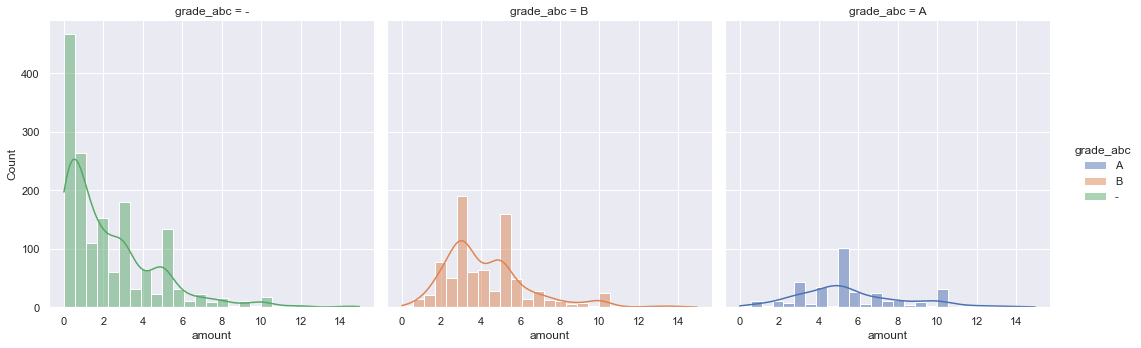

In [388]:
sns.displot(data=df[(df.amount < 15) & (df.grade_abc !='C') & (df.grade_abc !='P')],x='amountc',hue='grade_abc',kde=True,kind='hist',fill=True,col='grade_abc',hue_order=['A','B','-'])

In [501]:
df = df.drop(index=df[df.apply(lambda x: True if type(x['coupon']) is str else False,axis=1)].index,axis=0)
        

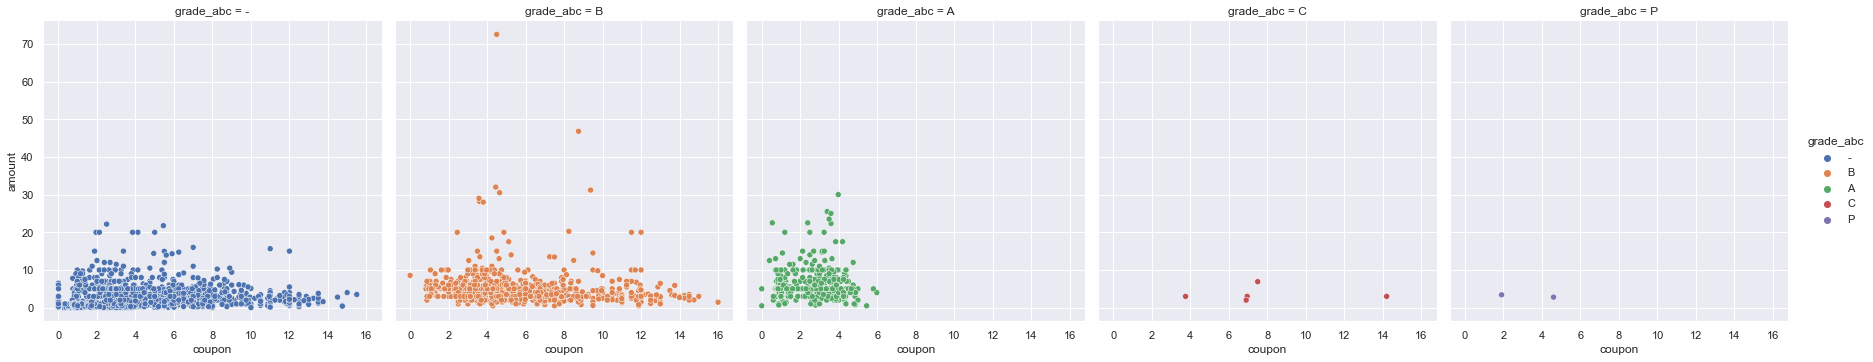

In [512]:
sns.relplot(data=df,x='coupon',y='amount',hue='grade_abc',col='grade_abc')

<AxesSubplot:xlabel='amount', ylabel='Density'>

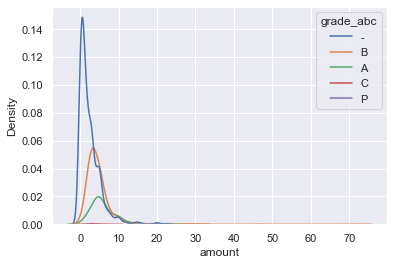

In [525]:
sns.kdeplot(data=df,x='amount',hue='grade_abc')

In [ ]:
df.coupon = df.coupon.astype(float)

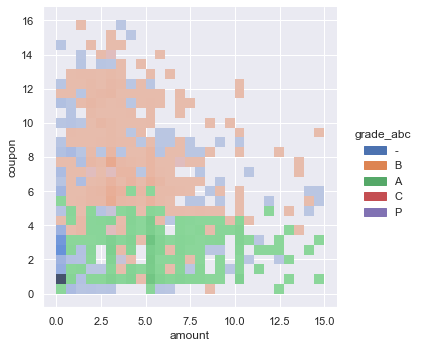

In [542]:
sns.displot(data=df[df.amount < 15],x='amount',y='coupon',kind='hist',hue='grade_abc'
            #,shade=True
           )

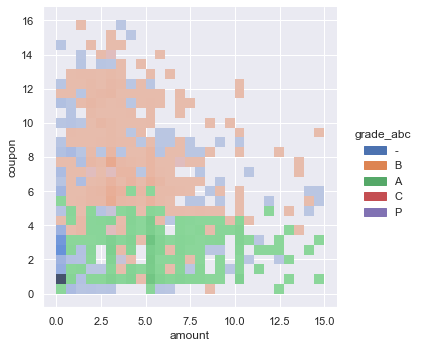

In [542]:
sns.displot(data=df[df.amount < 15],x='amount',y='coupon',kind='hist',hue='grade_abc'
            #,shade=True
           )

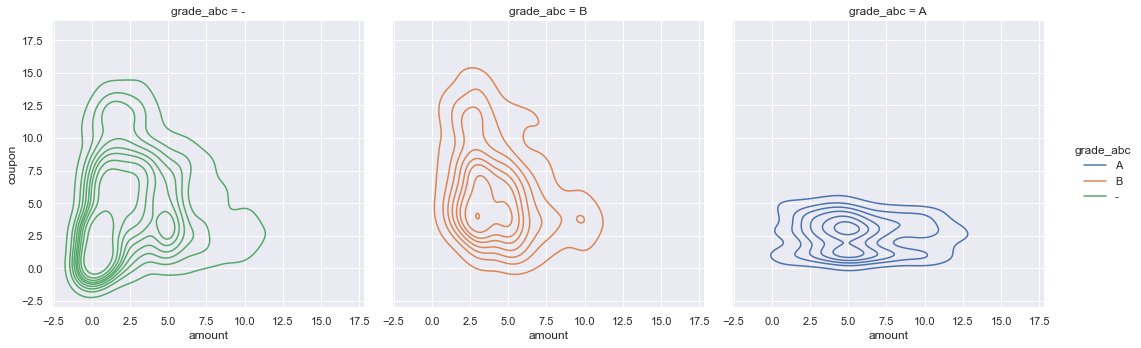

In [548]:
sns.displot(data=df[(df.amount < 15) & (df.grade_abc !='C') & (df.grade_abc !='P')],x='amount',y='coupon',hue='grade_abc',kind='kde',col='grade_abc',hue_order=['A','B','-'])

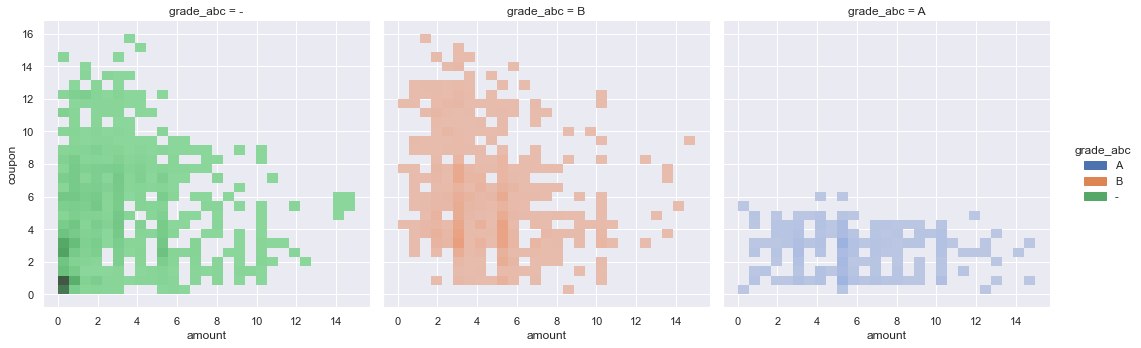

In [549]:
sns.displot(data=df[(df.amount < 15) & (df.grade_abc !='C') & (df.grade_abc !='P')],x='amount',y='coupon',hue='grade_abc',kind='hist',col='grade_abc',hue_order=['A','B','-'])

In [550]:
df

,code,isin,bond,bond_cn,issuer,province,city,section,sp,md,fs,maturity,coupon,amount,issdate,expdate,grade,grade_abc
0,LW154412 Corp,XS1415758991,DEGREE 7 1/4 06/03/21,３６１度,361 DEGREES INTL LTD,福建,晋江,纺织,-,-,-,4.999316,7.250,4.0,2016-06-03,2021-06-03 00:00:00,-,-
1,BO733635 Corp,XS2322572459,GZDZCD 2.95 03/30/24,SCI HK Development Ltd,SCI HK DEVELOPMENT LTD,广东,广州,工程,-,-,BBB,3.000684,2.950,4.0,2021-03-30,2024-03-30 00:00:00,BBB,B
2,BO733636 Corp,XS2310752758,GZDZCD 3 3/4 03/30/26,SCI HK Development Ltd,SCI HK DEVELOPMENT LTD,广东,广州,工程,-,-,BBB,4.999316,3.750,1.5,2021-03-30,2026-03-30 00:00:00,BBB,B
3,BK399068 Corp,XS2182296892,TCLTEC 1 7/8 07/14/25,TCL科技集团股份有限公司,TCL TECHNOLOGY INVEST,广东,惠州,硬件,-,A1,-,4.999316,1.875,3.0,2020-07-14,2025-07-14 00:00:00,A1,A
4,AH008487 Corp,US26853AAA88,EHICAR 7 1/2 12/08/18,一嗨租车,EHI CAR SERVICES LTD,上海,上海,零售,-,-,-,3.000684,7.500,2.0,2015-12-08,2018-12-08 00:00:00,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,ZO487465 Corp,US88556LAE65,YANTZE 2.15 09/22/30,中国长江三峡集团有限公司,THREE GORGES FIN I KY,北京,NaN,电力,-,A1,A+,9.998631,2.150,5.0,2020-09-22,2030-09-22 00:00:00,A1,A
193,LW139565 Corp,US88556LAB27,YANTZE 2.3 06/02/21,中国长江三峡集团有限公司,THREE GORGES FIN I KY,北京,NaN,电力,-,-,-,4.999316,2.300,5.0,2016-06-02,2021-06-02 00:00:00,-,-
194,ZQ036200 Corp,XS2053345646,YANTZE 2.3 10/16/24,中国长江三峡集团有限公司,THREE GORGES FIN I KY,北京,NaN,电力,-,A1,A+,5.002053,2.300,5.0,2019-10-16,2024-10-16 00:00:00,A1,A
195,LW208559 Corp,US88556LAC00,YANTZE 3.15 06/02/26,中国长江三峡集团有限公司,THREE GORGES FIN I KY,北京,NaN,电力,-,A1,A+,9.998631,3.150,10.0,2016-06-02,2026-06-02 00:00:00,A1,A


In [555]:
df_month = df.groupby(pd.Grouper(key='issdate',freq='M')).agg({'coupon':'mean','amount':'sum'})

In [556]:
df_month

,coupon,amount
issdate,,
2015-08-31,3.248375,20.800000
2015-09-30,2.120076,51.862000
2015-10-31,1.177004,39.176180
2015-11-30,2.392154,145.591290
2015-12-31,3.900294,85.589000
...,...,...
2021-04-30,3.931618,149.672500
2021-05-31,4.519868,115.836634
2021-06-30,4.320153,176.435057


<AxesSubplot:xlabel='issdate', ylabel='coupon'>

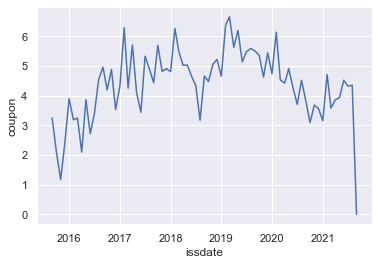

In [563]:
sns.lineplot(data=df_month.coupon)

<AxesSubplot:xlabel='issdate', ylabel='amount'>

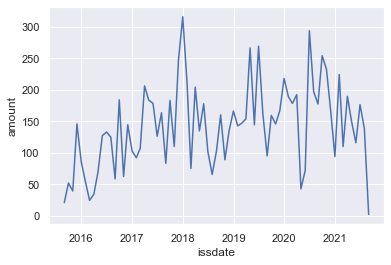

In [562]:
sns.lineplot(data=df_month.amount)

<AxesSubplot:xlabel='coupon', ylabel='amount'>

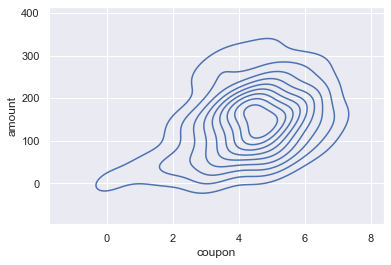

In [567]:
sns.kdeplot(data=df_month,x='coupon',y='amount')